In [34]:
# William Chisholm
# wcc254
%matplotlib inline

# Importing required modules from Qiskit and matplotlib
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Ask user to select initial state: |0⟩ or |1⟩
initial_state = input("Enter initial qubit state (0 or 1): ").strip()

# Validate input
if initial_state not in ['0', '1']:
    raise ValueError("Invalid input. Please enter 0 or 1.")

# Convert to integer
initial_bit = int(initial_state)

Enter initial qubit state (0 or 1):  0


In [46]:
def apply_gate_and_plot_bloch(gate_func, gate_name, *args):
    # Create a single-qubit circuit
    qc = QuantumCircuit(1)

    # Prepare the user-specified initial state
    if initial_bit == 1:
        qc.x(0)  # Flip |0⟩ to |1⟩ if needed

    # Apply the selected gate
    gate_func(qc, *args)

    # Extract the statevector
    state = Statevector.from_instruction(qc)
    a, b = state.data

    # Calculate Bloch sphere coordinates
    x = 2 * (a.conjugate() * b).real
    y = 2 * (a.conjugate() * b).imag
    z = abs(a)**2 - abs(b)**2

    # Print Bloch vector and state
    print("="*50)
    print(f"{gate_name} Gate Applied (Initial |{initial_bit}⟩)")
    print("Full Statevector:")
    print(f"  a (|0⟩) = {a:.4f}")
    print(f"  b (|1⟩) = {b:.4f}")
    print("Bloch Sphere Coordinates:")
    print(f"  X = {x:.3f}")
    print(f"  Y = {y:.3f}")
    print(f"  Z = {z:.3f}")

    # Visualize Bloch sphere
    plot_bloch_multivector(state).suptitle(f"Bloch Sphere: {gate_name} (from |{initial_bit}⟩)")
    plt.show()


In [38]:
# Basic gate functions
def apply_x(qc): qc.x(0)
def apply_y(qc): qc.y(0)
def apply_z(qc): qc.z(0)
def apply_h(qc): qc.h(0)

# Phase gate with default θ = π/4
def apply_phase(qc, theta=np.pi/4): qc.p(theta, 0)

# Rotation gates with default θ = π/2
def apply_rx(qc, theta=np.pi/2): qc.rx(theta, 0)
def apply_ry(qc, theta=np.pi/2): qc.ry(theta, 0)
def apply_rz(qc, theta=np.pi/2): qc.rz(theta, 0)

X Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 0.0000+0.0000j
  b (|1⟩) = 1.0000+0.0000j
Bloch Sphere Coordinates:
  X = 0.000
  Y = 0.000
  Z = -1.000


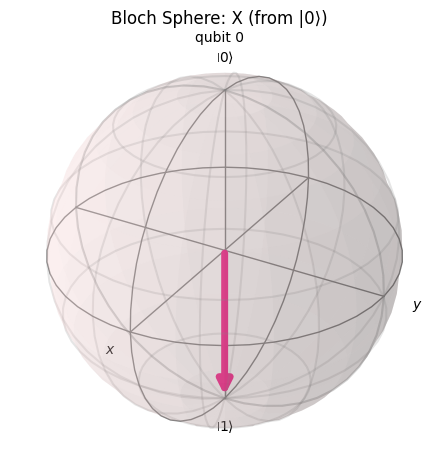

Y Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 0.0000+0.0000j
  b (|1⟩) = 0.0000+1.0000j
Bloch Sphere Coordinates:
  X = 0.000
  Y = 0.000
  Z = -1.000


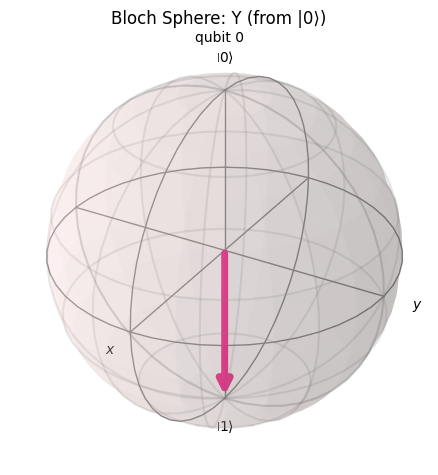

Z Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 1.0000+0.0000j
  b (|1⟩) = 0.0000+0.0000j
Bloch Sphere Coordinates:
  X = 0.000
  Y = 0.000
  Z = 1.000


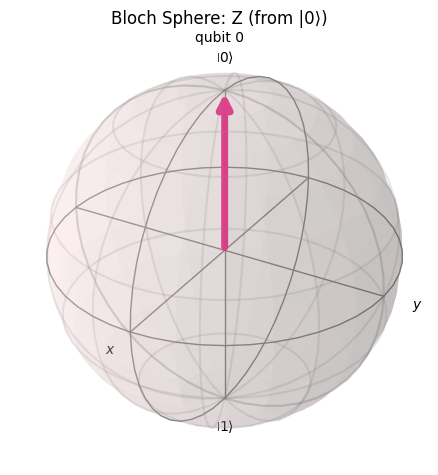

H Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 0.7071+0.0000j
  b (|1⟩) = 0.7071+0.0000j
Bloch Sphere Coordinates:
  X = 1.000
  Y = 0.000
  Z = 0.000


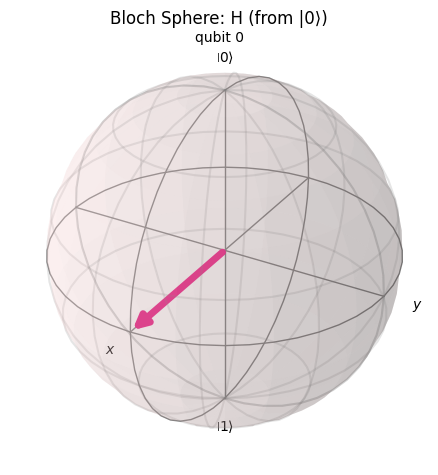

Phase (π/4) Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 1.0000+0.0000j
  b (|1⟩) = 0.0000+0.0000j
Bloch Sphere Coordinates:
  X = 0.000
  Y = 0.000
  Z = 1.000


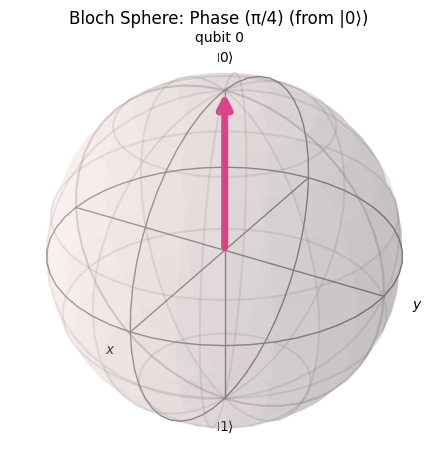

Rx (π/2) Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 0.7071+0.0000j
  b (|1⟩) = 0.0000-0.7071j
Bloch Sphere Coordinates:
  X = 0.000
  Y = -1.000
  Z = 0.000


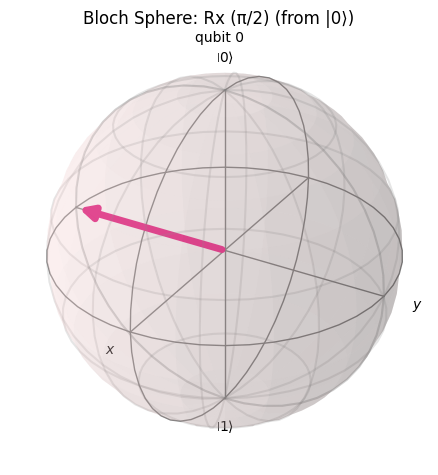

Ry (π/2) Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 0.7071+0.0000j
  b (|1⟩) = 0.7071+0.0000j
Bloch Sphere Coordinates:
  X = 1.000
  Y = 0.000
  Z = 0.000


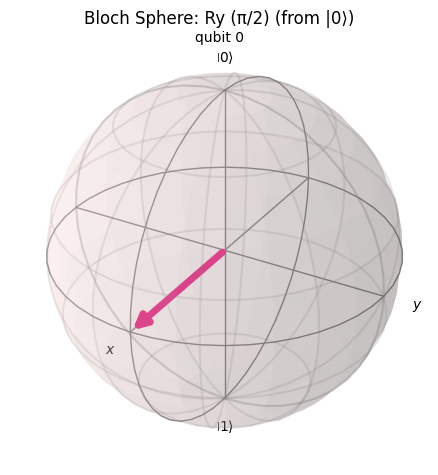

Rz (π/2) Gate Applied (Initial |0⟩)
Full Statevector:
  a (|0⟩) = 0.7071-0.7071j
  b (|1⟩) = 0.0000+0.0000j
Bloch Sphere Coordinates:
  X = 0.000
  Y = 0.000
  Z = 1.000


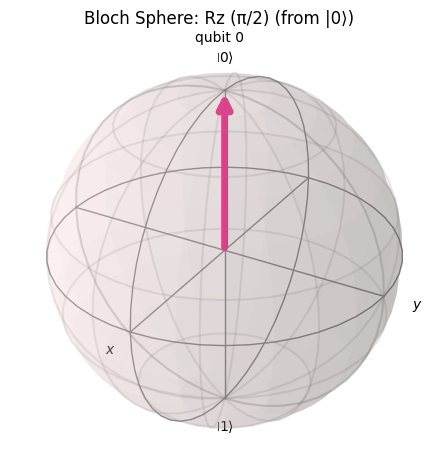

In [49]:
# List of gates to apply
gate_list = [
    ("X", apply_x),
    ("Y", apply_y),
    ("Z", apply_z),
    ("H", apply_h),
    ("Phase (π/4)", apply_phase),
    ("Rx (π/2)", apply_rx),
    ("Ry (π/2)", apply_ry),
    ("Rz (π/2)", apply_rz),
]

# Run analysis and visualization for each gate at state ∣0⟩
for name, func in gate_list:
    apply_gate_and_plot_bloch(func, name)